In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

df = pd.read_csv("Customers.csv")

In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [3]:
df = df.drop(['Gender'],axis=1)

In [4]:
df.head()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,19,15000,39,Healthcare,1,4
1,2,21,35000,81,Engineer,3,3
2,3,20,86000,6,Engineer,1,1
3,4,23,59000,77,Lawyer,0,2
4,5,31,38000,40,Entertainment,2,6


In [5]:
df = df.drop(['Profession'],axis=1)

In [6]:
df = df.drop(['Age'],axis=1)

In [7]:
df.head()

,CustomerID,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,1,15000,39,1,4
1,2,35000,81,3,3
2,3,86000,6,1,1
3,4,59000,77,0,2
4,5,38000,40,2,6


In [8]:
df = df.drop(['Family Size'],axis=1)

In [9]:
df.head()

,CustomerID,Annual Income ($),Spending Score (1-100),Work Experience
0,1,15000,39,1
1,2,35000,81,3
2,3,86000,6,1
3,4,59000,77,0
4,5,38000,40,2


In [10]:
df = df.drop(['Work Experience'],axis=1)

In [11]:
df.head()

,CustomerID,Annual Income ($),Spending Score (1-100)
0,1,15000,39
1,2,35000,81
2,3,86000,6
3,4,59000,77
4,5,38000,40


In [12]:
df.rename(columns = {'Annual Income ($)':'income'},inplace=True)
df.rename(columns = {'Spending Score (1-100)':'score'},inplace=True)

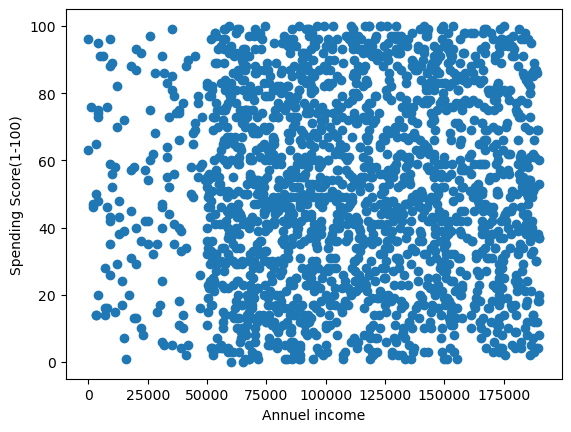

In [13]:
plt.scatter(df['income'],df['score'])
plt.xlabel('Annuel income')
plt.ylabel('Spending Score(1-100)')
plt.show()

In [14]:
scaler = MinMaxScaler()
scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])
scaler.fit(df[['score']])
df['score'] = scaler.transform(df[['score']])

In [15]:
df.head()

,CustomerID,income,score
0,1,0.078958,0.39
1,2,0.184236,0.81
2,3,0.452694,0.06
3,4,0.310569,0.77
4,5,0.200027,0.40


In [16]:
k_range = range(1,11)

list_dist = []

for k in k_range:
    kmeans_modelim = KMeans(n_clusters=k)
    kmeans_modelim.fit(df[['income','score']])
    list_dist.append(kmeans_modelim.inertia_)

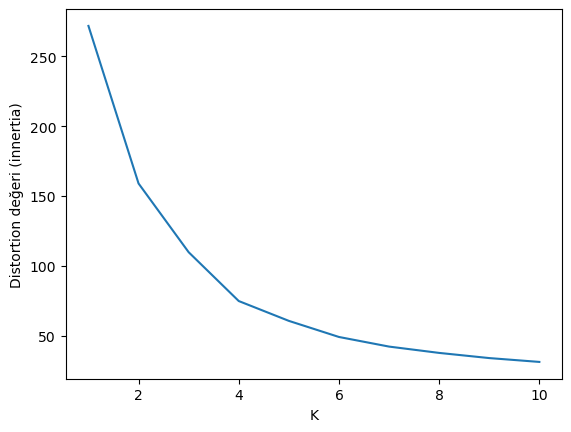

In [17]:
plt.xlabel('K')
plt.ylabel('Distortion değeri (innertia)')
plt.plot(k_range,list_dist)
plt.show()

In [18]:
kmeans_modelim = KMeans(n_clusters = 4)
y_predicted = kmeans_modelim.fit_predict(df[['income','score']])
y_predicted

array([1, 2, 1, ..., 1, 3, 2])

In [19]:
df

,CustomerID,income,score
0,1,0.078958,0.39
1,2,0.184236,0.81
2,3,0.452694,0.06
3,4,0.310569,0.77
4,5,0.200027,0.40
...,...,...,...
1995,1996,0.970591,0.40
1996,1997,0.385095,0.32
1997,1998,0.478808,0.14
1998,1999,0.958600,0.04


In [20]:
df['cluster'] = y_predicted
df.head()

,CustomerID,income,score,cluster
0,1,0.078958,0.39,1
1,2,0.184236,0.81,2
2,3,0.452694,0.06,1
3,4,0.310569,0.77,2
4,5,0.200027,0.40,1


In [21]:
kmeans_modelim.cluster_centers_

array([[0.77807968, 0.78418103],
       [0.38641875, 0.24305051],
       [0.38084379, 0.71470699],
       [0.80465826, 0.30664062]])

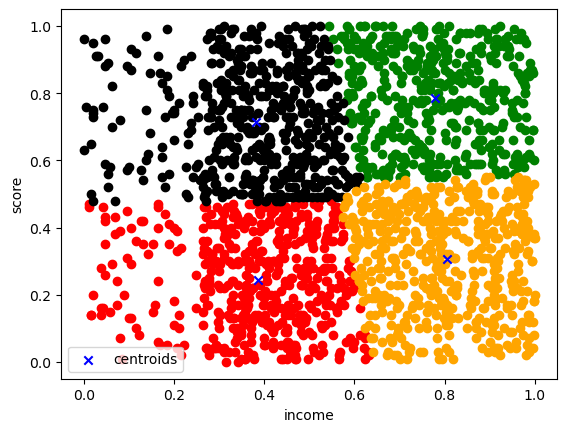

In [23]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]

plt.xlabel('income')
plt.ylabel('score')
plt.scatter(df1['income'],df1['score'],color='green')
plt.scatter(df2['income'],df2['score'],color='red')
plt.scatter(df3['income'],df3['score'],color='black')
plt.scatter(df4['income'],df4['score'],color='orange')

plt.scatter(kmeans_modelim.cluster_centers_[:,0], kmeans_modelim.cluster_centers_[:,1], color='blue', marker='x', label='centroids')
plt.legend()
plt.show()